In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('emails.csv')

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head

<bound method NDFrame.head of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastru

In [5]:
# input data
x=df.drop(['Email No.', 'Prediction'], axis=1)

# output data
y=df['Prediction']

In [6]:
x.shape

(5172, 3000)

In [7]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

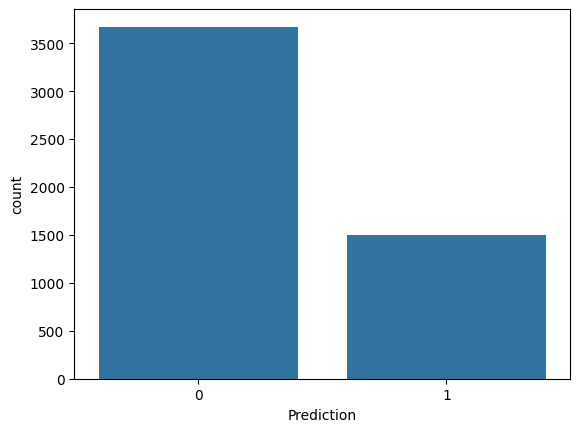

In [8]:
sns.countplot(x=y);

In [9]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [10]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [12]:
# cross-validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

In [13]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# create the object
knn=KNeighborsClassifier(n_neighbors=5)

In [15]:
# train the algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
# predict on test data
print(knn.predict(x_test))

[0 0 1 ... 0 0 0]


In [17]:
print(knn.score(x_test, y_test))

0.8631090487238979


In [18]:
from sklearn.svm import SVC

In [19]:
svm=SVC(kernel='linear')

In [32]:
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [33]:
y_pred = svm.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.7540603248259861


In [36]:
svm=SVC(kernel='rbf')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [37]:
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.8120649651972158


In [38]:
svm=SVC(kernel='poly')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [39]:
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.7540603248259861
